**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 1

**Datos de la entrega:** Lunes 25 de setiembre 2023, a más tardar a las 11:59 pm

**Estudiantes:**
- Daniel Araya Sambucci 
- Esteban Leiva Montenegro 2020426227






# Parte 1.  Series temporales y graficación  (65 puntos)

1. Se adjuntan un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie los capítulos en el PDF, se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo la serie temporal en el archivo: TS_d_1, realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.
1. Considere que el código ejemplo en el PDF podría requerir algún pequeño cambio por un tema de versiones de la biblioteca en el tiempo.


In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### 1.1
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [31]:
"""The documetation indicates the use of Series.from_csv() to load files has been deprecated
use pandas.read_csv() instead. https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.from_csv.html
"""
series = pd.read_csv('TS_d_1.csv',
                     header=0 , #Specify the header information at row 0
                     parse_dates=[0],  #In first column contains dates that need to be parsed
                     index_col=0) #Index information for the time
print(series.head()) #For default shows first five rows
print(type(series)) #Shows series type

          temperatura
fecha                
1/1/2004          5.3
2/1/2004          5.6
3/1/2004          5.9
4/1/2004          6.2
5/1/2004          8.4
<class 'pandas.core.frame.DataFrame'>


### 1.2
- Muestra el promedio, la mediana y la desviación estándar de los datos

In [46]:
#We can use series.describe() to get stadistics summary or do separately
print('Mean: ',series['temperatura'].mean())
print('Median: ', series['temperatura'].median())
print('Standard deviation: ', series['temperatura'].std())


Mean:  8.013887134133503
Median:  7.4
Standard deviation:  3.8639481208695945


### 1.3
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, luego el promedio para todos los febreros, y así sucevivamente.

In [64]:

dataframe = pd.DataFrame() #New dataframe to make another table with other columns
dataframe['month'] = [ datetime.strptime(series.index[i],"%d/%m/%Y").month for i in range(len(series))] #Assing month to dataframe
dataframe['temperature'] = [series['temperatura'].iloc[i] for i in range(len(series))]  #Assing temperature to new dataframe
print(dataframe.groupby('month')['temperature'].mean()) #Group for month data and get mean



month
1     7.688139
2     7.735815
3     7.874268
4     8.524821
5     8.221762
6     7.273333
7     7.706328
8     8.226898
9     8.821692
10    8.498586
11    7.806769
12    7.776055
Name: temperature, dtype: float64


### 1.4 
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=5

In [88]:
temps =pd.DataFrame(series.values) #Created a new dataframe with de same values
lag: int  = 5 #lag value 
dataframe = pd.concat([temps.shift(i) for i in range(lag,0 , -1)], axis=1)#uses generical for to create a shifting values  
dataframe.columns = [f"t-{i}" for i in range(lag)] #uses to create the generical columns
print(dataframe.head(20)) #This is for show result

    t-0   t-1    t-2    t-3    t-4
0   NaN   NaN    NaN    NaN    NaN
1   NaN   NaN    NaN    NaN   5.30
2   NaN   NaN    NaN   5.30   5.60
3   NaN   NaN   5.30   5.60   5.90
4   NaN   5.3   5.60   5.90   6.20
5   5.3   5.6   5.90   6.20   8.40
6   5.6   5.9   6.20   8.40   7.90
7   5.9   6.2   8.40   7.90   7.60
8   6.2   8.4   7.90   7.60   7.70
9   8.4   7.9   7.60   7.70   7.10
10  7.9   7.6   7.70   7.10   6.80
11  7.6   7.7   7.10   6.80   5.70
12  7.7   7.1   6.80   5.70   6.20
13  7.1   6.8   5.70   6.20   6.50
14  6.8   5.7   6.20   6.50   5.90
15  5.7   6.2   6.50   5.90   8.70
16  6.2   6.5   5.90   8.70  12.80
17  6.5   5.9   8.70  12.80   5.13
18  5.9   8.7  12.80   5.13   5.14
19  8.7  12.8   5.13   5.14   5.16


### 1.5
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 3. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [96]:

temps = pd.DataFrame(series.values)# Create a DataFrame from series values
width: int = 3# Set the width of the rolling window
shifted = temps.shift(width-1 )# Shift the data by (width - 1) time steps
window = shifted.rolling(window=width)# Apply a rolling window with the specified width
# Concatenate minimum, mean, maximum, and original values into a new DataFrame
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
# Set column names
dataframe.columns = ['min', 'mean', 'max', 't+1']
# Print the first 5 rows of the resulting DataFrame
print(dataframe.head(10))





   min      mean  max  t+1
0  NaN       NaN  NaN  5.3
1  NaN       NaN  NaN  5.6
2  NaN       NaN  NaN  5.9
3  NaN       NaN  NaN  6.2
4  5.3  5.600000  5.9  8.4
5  5.6  5.900000  6.2  7.9
6  5.9  6.833333  8.4  7.6
7  6.2  7.500000  8.4  7.7
8  7.6  7.966667  8.4  7.1
9  7.6  7.733333  7.9  6.8


### 1.6
- A la variable series, aplíquele la instrucción series.plot(). 
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

<Axes: xlabel='fecha'>

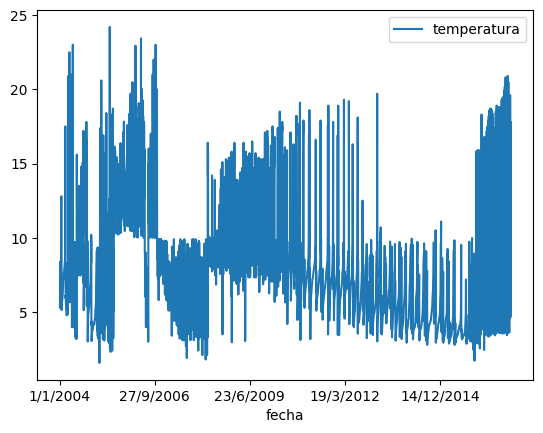

In [97]:
series.plot()
"""

"""

### 1.7

- Agrupe los datos y muestre un gráfico similar al de la seccion 6.4 de las lecturas (Stacked lines plots).  
- ¿Puede hacer algún comentario del comportamiento anual de los datos?

### 1.8
- Muestre el histograma de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.9
- Muestre el gráfico de densidad de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.10
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año. 
1. ¿Cómo se interpreta un gráfico Boxplot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

### 1.11
- Agrupe los datos de la variable serie de manera Anual, y muestre el Heat Map por año. 
1. ¿Cómo se interpreta un gráfico Heat Map?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.12
- Muestre el Lag Scatter plot de la variable series. 
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.13
- Muestre el gráfico Autocorrelación de la variable series. 
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


# Parte 2.  Diferenciación  (15 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie el capítulo 15. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'TS_d_2.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 2.1
- Cargue el archivo proporcionado y muestre los 10 primeros registros.

### 2.2

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

### 2.3

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

### 2.4

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué sé mira así relacionado con la necesidad o no de diferenciación?

### 2.5

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué cree que sé mira así?

# Parte 3.  ARIMA  (20 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Cap_24. Estudie su contenido. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'TS_d_3.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 3.1

- Explique en qué consiste ARIMA.

### 3.2

- Cargue el archivo y use los gráficos que considere prudente para ver cómo se comportan los datos
- Comente sus conclusiones

### 3.3

- Analice si requiere hacer diferenciación o no. Explique

### 3.4

- Haga forecast (similar a las últimas secciones de ese capítulo), con un train de 80% y un test de 20% (no olvide que son series temporales, no datos i.i.d.)

### 3.5

- Grafique el predicho versus el real y comente sus conclusiones.